In [1]:
%matplotlib inline


# Annotations

Annotating text with Matplotlib.
   :depth: 3


In [2]:
from matplotlib import pyplot as plt


## Basic annotation

The uses of the basic :func:`~matplotlib.pyplot.text` will place text
at an arbitrary position on the Axes.  A common use case of text is to
annotate some feature of the plot, and the
:func:`~matplotlib.axes.Axes.annotate` method provides helper functionality
to make annotations easy.  In an annotation, there are two points to
consider: the location being annotated represented by the argument
*xy* and the location of the text *xytext*.  Both of these
arguments are ``(x, y)`` tuples.

.. figure:: ../../gallery/text_labels_and_annotations/images/sphx_glr_annotation_basic_001.png
   :target: ../../gallery/text_labels_and_annotations/annotation_basic.html
   :align: center

In this example, both the *xy* (arrow tip) and *xytext* locations
(text location) are in data coordinates.  There are a variety of other
coordinate systems one can choose -- you can specify the coordinate
system of *xy* and *xytext* with one of the following strings for
*xycoords* and *textcoords* (default is 'data')

==================  ========================================================
argument            coordinate system
==================  ========================================================
'figure points'     points from the lower left corner of the figure
'figure pixels'     pixels from the lower left corner of the figure
'figure fraction'   (0, 0) is lower left of figure and (1, 1) is upper right
'axes points'       points from lower left corner of axes
'axes pixels'       pixels from lower left corner of axes
'axes fraction'     (0, 0) is lower left of axes and (1, 1) is upper right
'data'              use the axes data coordinate system
==================  ========================================================

For example to place the text coordinates in fractional axes
coordinates, one could do::

    ax.annotate('local max', xy=(3, 1),  xycoords='data',
                xytext=(0.8, 0.95), textcoords='axes fraction',
                arrowprops=dict(facecolor='black', shrink=0.05),
                horizontalalignment='right', verticalalignment='top',
                )

For physical coordinate systems (points or pixels) the origin is the
bottom-left of the figure or axes.

Optionally, you can enable drawing of an arrow from the text to the annotated
point by giving a dictionary of arrow properties in the optional keyword
argument *arrowprops*.


==================== =====================================================
*arrowprops* key     description
==================== =====================================================
width                the width of the arrow in points
frac                 the fraction of the arrow length occupied by the head
headwidth            the width of the base of the arrow head in points
shrink               move the tip and base some percent away from
                     the annotated point and text

\*\*kwargs           any key for :class:`matplotlib.patches.Polygon`,
                     e.g., ``facecolor``
==================== =====================================================


In the example below, the *xy* point is in native coordinates
(*xycoords* defaults to 'data').  For a polar axes, this is in
(theta, radius) space.  The text in this example is placed in the
fractional figure coordinate system. :class:`matplotlib.text.Text`
keyword arguments like *horizontalalignment*, *verticalalignment* and
*fontsize* are passed from `~matplotlib.axes.Axes.annotate` to the
``Text`` instance.

.. figure:: ../../gallery/text_labels_and_annotations/images/sphx_glr_annotation_polar_001.png
   :target: ../../gallery/text_labels_and_annotations/annotation_polar.html
   :align: center

For more on all the wild and wonderful things you can do with
annotations, including fancy arrows, see `plotting-guide-annotation`
and :doc:`/gallery/text_labels_and_annotations/annotation_demo`.


Do not proceed unless you have already read `annotations-tutorial`,
:func:`~matplotlib.pyplot.text` and :func:`~matplotlib.pyplot.annotate`!



## Advanced Annotations

### Annotating with Text with Box

Let's start with a simple example.

.. figure:: ../../gallery/userdemo/images/sphx_glr_annotate_text_arrow_001.png
   :target: ../../gallery/userdemo/annotate_text_arrow.html
   :align: center

`~.Axes.text` takes a *bbox* keyword argument, which draws a box around the
text::

    t = ax.text(
        0, 0, "Direction", ha="center", va="center", rotation=45, size=15,
        bbox=dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2))

The patch object associated with the text can be accessed by::

    bb = t.get_bbox_patch()

The return value is a `.FancyBboxPatch`; patch properties
(facecolor, edgewidth, etc.) can be accessed and modified as usual.
`.FancyBboxPatch.set_boxstyle` sets the box shape::

  bb.set_boxstyle("rarrow", pad=0.6)

The arguments are the name of the box style with its attributes as
keyword arguments. Currently, following box styles are implemented.

  ==========   ==============   ==========================
  Class        Name             Attrs
  ==========   ==============   ==========================
  Circle       ``circle``       pad=0.3
  DArrow       ``darrow``       pad=0.3
  LArrow       ``larrow``       pad=0.3
  RArrow       ``rarrow``       pad=0.3
  Round        ``round``        pad=0.3,rounding_size=None
  Round4       ``round4``       pad=0.3,rounding_size=None
  Roundtooth   ``roundtooth``   pad=0.3,tooth_size=None
  Sawtooth     ``sawtooth``     pad=0.3,tooth_size=None
  Square       ``square``       pad=0.3
  ==========   ==============   ==========================

.. figure:: ../../gallery/shapes_and_collections/images/sphx_glr_fancybox_demo_001.png
   :target: ../../gallery/shapes_and_collections/fancybox_demo.html
   :align: center

Note that the attribute arguments can be specified within the style
name with separating comma (this form can be used as "boxstyle" value
of bbox argument when initializing the text instance) ::

   bb.set_boxstyle("rarrow,pad=0.6")

### Annotating with Arrow

`~.Axes.annotate` draws an arrow connecting two points in an Axes::

    ax.annotate("Annotation",
                xy=(x1, y1), xycoords='data',
                xytext=(x2, y2), textcoords='offset points',
                )

This annotates a point at *xy* in the given coordinate (*xycoords*)
with the text at *xytext* given in *textcoords*. Often, the
annotated point is specified in the *data* coordinate and the annotating
text in *offset points*.
See `~.Axes.annotate` for available coordinate systems.

An arrow connecting *xy* to *xytext* can be optionally drawn by
specifying the *arrowprops* argument. To draw only an arrow, use
empty string as the first argument. ::

    ax.annotate("",
                xy=(0.2, 0.2), xycoords='data',
                xytext=(0.8, 0.8), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"),
                )

.. figure:: ../../gallery/userdemo/images/sphx_glr_annotate_simple01_001.png
   :target: ../../gallery/userdemo/annotate_simple01.html
   :align: center

The arrow is drawn as follows:

1. A path connecting the two points is created, as specified by the
   *connectionstyle* parameter.
2. The path is clipped to avoid patches *patchA* and *patchB*, if these are
   set.
3. The path is further shrunk by *shrinkA* and *shrinkB* (in pixels).
4. The path is transmuted to an arrow patch, as specified by the *arrowstyle*
   parameter.

.. figure:: ../../gallery/userdemo/images/sphx_glr_annotate_explain_001.png
   :target: ../../gallery/userdemo/annotate_explain.html
   :align: center

The creation of the connecting path between two points is controlled by
``connectionstyle`` key and the following styles are available.

   ==========   =============================================
   Name         Attrs
   ==========   =============================================
   ``angle``    angleA=90,angleB=0,rad=0.0
   ``angle3``   angleA=90,angleB=0
   ``arc``      angleA=0,angleB=0,armA=None,armB=None,rad=0.0
   ``arc3``     rad=0.0
   ``bar``      armA=0.0,armB=0.0,fraction=0.3,angle=None
   ==========   =============================================

Note that "3" in ``angle3`` and ``arc3`` is meant to indicate that the
resulting path is a quadratic spline segment (three control
points). As will be discussed below, some arrow style options can only
be used when the connecting path is a quadratic spline.

The behavior of each connection style is (limitedly) demonstrated in the
example below. (Warning: The behavior of the ``bar`` style is currently not
well defined, it may be changed in the future).

.. figure:: ../../gallery/userdemo/images/sphx_glr_connectionstyle_demo_001.png
   :target: ../../gallery/userdemo/connectionstyle_demo.html
   :align: center

The connecting path (after clipping and shrinking) is then mutated to
an arrow patch, according to the given ``arrowstyle``.

    ==========   =============================================
    Name         Attrs
    ==========   =============================================
    ``-``        None
    ``->``       head_length=0.4,head_width=0.2
    ``-[``       widthB=1.0,lengthB=0.2,angleB=None
    ``|-|``      widthA=1.0,widthB=1.0
    ``-|>``      head_length=0.4,head_width=0.2
    ``<-``       head_length=0.4,head_width=0.2
    ``<->``      head_length=0.4,head_width=0.2
    ``<|-``      head_length=0.4,head_width=0.2
    ``<|-|>``    head_length=0.4,head_width=0.2
    ``fancy``    head_length=0.4,head_width=0.4,tail_width=0.4
    ``simple``   head_length=0.5,head_width=0.5,tail_width=0.2
    ``wedge``    tail_width=0.3,shrink_factor=0.5
    ==========   =============================================

.. figure:: ../../gallery/text_labels_and_annotations/images/sphx_glr_fancyarrow_demo_001.png
   :target: ../../gallery/text_labels_and_annotations/fancyarrow_demo.html
   :align: center

Some arrowstyles only work with connection styles that generate a
quadratic-spline segment. They are ``fancy``, ``simple``, and ``wedge``.
For these arrow styles, you must use the "angle3" or "arc3" connection
style.

If the annotation string is given, the patchA is set to the bbox patch
of the text by default.

.. figure:: ../../gallery/userdemo/images/sphx_glr_annotate_simple02_001.png
   :target: ../../gallery/userdemo/annotate_simple02.html
   :align: center

As with `~.Axes.text`, a box around the text can be drawn using the *bbox*
argument.

.. figure:: ../../gallery/userdemo/images/sphx_glr_annotate_simple03_001.png
   :target: ../../gallery/userdemo/annotate_simple03.html
   :align: center

By default, the starting point is set to the center of the text
extent.  This can be adjusted with ``relpos`` key value. The values
are normalized to the extent of the text. For example, (0, 0) means
lower-left corner and (1, 1) means top-right.

.. figure:: ../../gallery/userdemo/images/sphx_glr_annotate_simple04_001.png
   :target: ../../gallery/userdemo/annotate_simple04.html
   :align: center

### Placing Artist at anchored Axes locations

There are classes of artists that can be placed at an anchored
location in the Axes.  A common example is the legend.  This type
of artist can be created by using the `.OffsetBox` class. A few
predefined classes are available in :mod:`matplotlib.offsetbox` and in
:mod:`mpl_toolkits.axes_grid1.anchored_artists`.



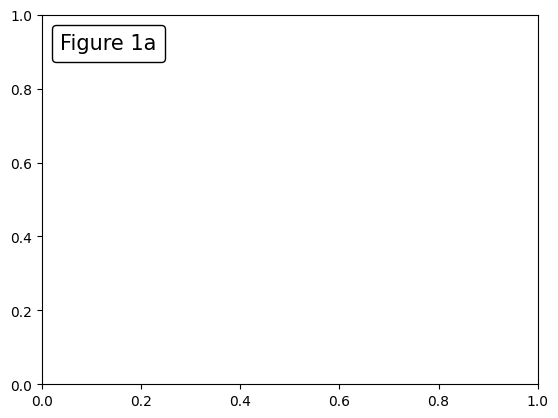

In [3]:
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots()
at = AnchoredText(
    "Figure 1a", prop=dict(size=15), frameon=True, loc='upper left')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

The *loc* keyword has same meaning as in the legend command.

A simple application is when the size of the artist (or collection of
artists) is known in pixel size during the time of creation. For
example, If you want to draw a circle with fixed size of 20 pixel x 20
pixel (radius = 10 pixel), you can utilize
`~mpl_toolkits.axes_grid1.anchored_artists.AnchoredDrawingArea`. The instance
is created with a size of the drawing area (in pixels), and arbitrary artists
can added to the drawing area. Note that the extents of the artists that are
added to the drawing area are not related to the placement of the drawing
area itself. Only the initial size matters.

The artists that are added to the drawing area should not have a
transform set (it will be overridden) and the dimensions of those
artists are interpreted as a pixel coordinate, i.e., the radius of the
circles in above example are 10 pixels and 5 pixels, respectively.



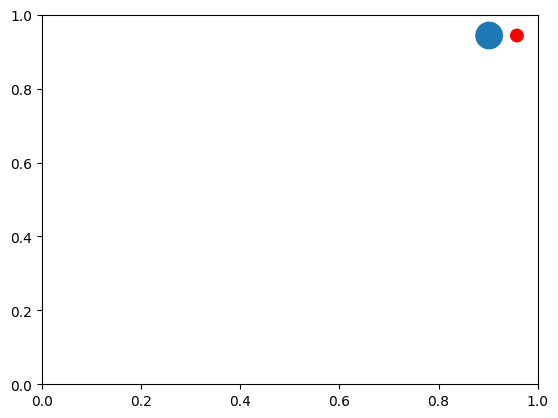

In [4]:
from matplotlib.patches import Circle
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDrawingArea

fig, ax = plt.subplots()
ada = AnchoredDrawingArea(40, 20, 0, 0,
                          loc='upper right', pad=0., frameon=False)
p1 = Circle((10, 10), 10)
ada.drawing_area.add_artist(p1)
p2 = Circle((30, 10), 5, fc="r")
ada.drawing_area.add_artist(p2)
ax.add_artist(ada)

Sometimes, you want your artists to scale with the data coordinate (or
coordinates other than canvas pixels). You can use
`~mpl_toolkits.axes_grid1.anchored_artists.AnchoredAuxTransformBox` class.
This is similar to
`~mpl_toolkits.axes_grid1.anchored_artists.AnchoredDrawingArea` except that
the extent of the artist is determined during the drawing time respecting the
specified transform.

The ellipse in the example below will have width and height
corresponding to 0.1 and 0.4 in data coordinates and will be
automatically scaled when the view limits of the axes change.



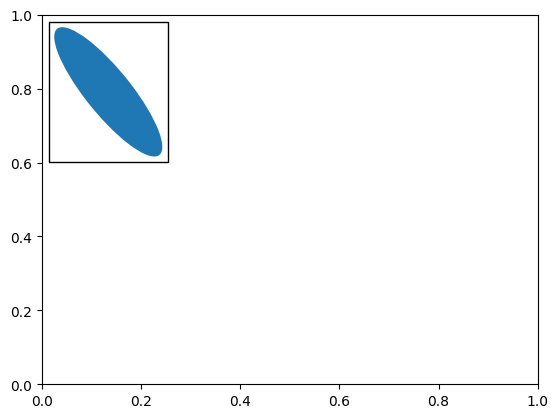

In [5]:
from matplotlib.patches import Ellipse
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredAuxTransformBox

fig, ax = plt.subplots()
box = AnchoredAuxTransformBox(ax.transData, loc='upper left')
el = Ellipse((0, 0), width=0.1, height=0.4, angle=30)  # in data coordinates!
box.drawing_area.add_artist(el)
ax.add_artist(box)

As in the legend, the bbox_to_anchor argument can be set.  Using the
HPacker and VPacker, you can have an arrangement(?) of artist as in the
legend (as a matter of fact, this is how the legend is created).

.. figure:: ../../gallery/userdemo/images/sphx_glr_anchored_box04_001.png
   :target: ../../gallery/userdemo/anchored_box04.html
   :align: center

Note that unlike the legend, the ``bbox_transform`` is set
to IdentityTransform by default.

### Coordinate systems for Annotations

Matplotlib Annotations support several types of coordinates.  Some are
described in `annotations-tutorial`; more advanced options are

1. A `.Transform` instance.  For example, ::

     ax.annotate("Test", xy=(0.5, 0.5), xycoords=ax.transAxes)

   is identical to ::

     ax.annotate("Test", xy=(0.5, 0.5), xycoords="axes fraction")

   This allows annotating a point in another axes::

     fig, (ax1, ax2) = plt.subplots(1, 2)
     ax2.annotate("Test", xy=(0.5, 0.5), xycoords=ax1.transData,
                  xytext=(0.5, 0.5), textcoords=ax2.transData,
                  arrowprops=dict(arrowstyle="->"))

2. An `.Artist` instance. The *xy* value (or *xytext*) is interpreted as a
   fractional coordinate of the bbox (return value of *get_window_extent*) of
   the artist::

     an1 = ax.annotate("Test 1", xy=(0.5, 0.5), xycoords="data",
                       va="center", ha="center",
                       bbox=dict(boxstyle="round", fc="w"))
     an2 = ax.annotate("Test 2", xy=(1, 0.5), xycoords=an1,  # (1, 0.5) of the an1's bbox
                       xytext=(30, 0), textcoords="offset points",
                       va="center", ha="left",
                       bbox=dict(boxstyle="round", fc="w"),
                       arrowprops=dict(arrowstyle="->"))

   .. figure:: ../../gallery/userdemo/images/sphx_glr_annotate_simple_coord01_001.png
      :target: ../../gallery/userdemo/annotate_simple_coord01.html
      :align: center

   Note that you must ensure that the extent of the coordinate artist (*an1* in
   above example) is determined before *an2* gets drawn. Usually, this means
   that *an2* needs to be drawn after *an1*.

3. A callable object that takes the renderer instance as single argument, and
   returns either a `.Transform` or a `.BboxBase`.  The return value is then
   handled as in (1), for transforms, or in (2), for bboxes.  For example, ::

     an2 = ax.annotate("Test 2", xy=(1, 0.5), xycoords=an1,
                       xytext=(30, 0), textcoords="offset points")

   is identical to::

     an2 = ax.annotate("Test 2", xy=(1, 0.5), xycoords=an1.get_window_extent,
                       xytext=(30, 0), textcoords="offset points")

4. A pair of coordinate specifications -- the first for the x-coordinate, and
   the second is for the y-coordinate; e.g. ::

     annotate("Test", xy=(0.5, 1), xycoords=("data", "axes fraction"))

   Here, 0.5 is in data coordinates, and 1 is in normalized axes coordinates.
   Each of the coordinate specifications can also be an artist or a transform.
   For example,

   .. figure:: ../../gallery/userdemo/images/sphx_glr_annotate_simple_coord02_001.png
      :target: ../../gallery/userdemo/annotate_simple_coord02.html
      :align: center

5. Sometimes, you want your annotation with some "offset points", not from the
   annotated point but from some other point.  `.text.OffsetFrom` is a helper
   for such cases.

   .. figure:: ../../gallery/userdemo/images/sphx_glr_annotate_simple_coord03_001.png
      :target: ../../gallery/userdemo/annotate_simple_coord03.html
      :align: center

   You may take a look at this example
   :doc:`/gallery/text_labels_and_annotations/annotation_demo`.

### Using ConnectionPatch

`.ConnectionPatch` is like an annotation without text. While `~.Axes.annotate`
is sufficient in most situations, `.ConnectionPatch` is useful when you want to
connect points in different axes. ::

  from matplotlib.patches import ConnectionPatch
  xy = (0.2, 0.2)
  con = ConnectionPatch(xyA=xy, coordsA=ax1.transData,
                        xyB=xy, coordsB=ax2.transData)
  fig.add_artist(con)

The above code connects point *xy* in the data coordinates of ``ax1`` to
point *xy* in the data coordinates of ``ax2``. Here is a simple example.

.. figure:: ../../gallery/userdemo/images/sphx_glr_connect_simple01_001.png
   :target: ../../gallery/userdemo/connect_simple01.html
   :align: center

Here, we added the `.ConnectionPatch` to the *figure* (with `~.Figure.add_artist`)
rather than to either axes: this ensures that it is drawn on top of both axes,
and is also necessary if using :doc:`constrained_layout
</tutorials/intermediate/constrainedlayout_guide>` for positioning the axes.

## Advanced Topics

### Zoom effect between Axes

`mpl_toolkits.axes_grid1.inset_locator` defines some patch classes useful for
interconnecting two axes. Understanding the code requires some knowledge of
Matplotlib's transform system.

.. figure:: ../../gallery/subplots_axes_and_figures/images/sphx_glr_axes_zoom_effect_001.png
   :target: ../../gallery/subplots_axes_and_figures/axes_zoom_effect.html
   :align: center

### Define Custom BoxStyle

You can use a custom box style. The value for the ``boxstyle`` can be a
callable object in the following forms.::

        def __call__(self, x0, y0, width, height, mutation_size,
                     aspect_ratio=1.):
            '''
            Given the location and size of the box, return the path of
            the box around it.

              - *x0*, *y0*, *width*, *height* : location and size of the box
              - *mutation_size* : a reference scale for the mutation.
              - *aspect_ratio* : aspect-ratio for the mutation.
            '''
            path = ...
            return path

Here is a complete example.

.. figure:: ../../gallery/userdemo/images/sphx_glr_custom_boxstyle01_001.png
   :target: ../../gallery/userdemo/custom_boxstyle01.html
   :align: center

Similarly, you can define a custom ConnectionStyle and a custom ArrowStyle.
See the source code of ``lib/matplotlib/patches.py`` and check
how each style class is defined.

